Run through pre-processed files through Clustering Algorithms 10 features:
<br>1) KMeans
<br>2) Agglomerative Linkage: Ward
<br>3) Agglomerative Linkage: Complete


### Findings from this Clustering Analysis:

The results of us

## Scale the values of the features - to be used as input for Clustering, and apply PCA for dimensionality reduction for visualization

The features where we found high correlation were selected to be used for further analysis:
- pitch+timbre - positive correlation
- valence+danceability - positive correlation
- energy+acousticness - negative correlation (high energy - low acoustic)
- energy+pitch - positive correlation

In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#songsDF = pd.read_pickle('../data/Songs_input.p')
songsDF = pd.read_pickle('../data/Songs_input_1128.p')

In [3]:
songsDF.columns

Index(['level_0', 'index', 'artist_id', 'tags', 'track_id', 'title', 'song_id',
       'release', 'artist_mbid', 'artist_name', 'duration',
       'artist_familiarity', 'artist_hotttnesss', 'year', 'track_7digitalid',
       'shs_perf', 'shs_work', 'lyrics_text', 'spotifyURI', 'songFeatures',
       'language', 'lyrics_clean', 'FKRG1', 'fkrg_sent1', 'FKRG2',
       'fkrg_sent2', 'bar_len', 'beat_len', 'seg_len', 'pitch_mean',
       'pitch_med', 'timbre_mean', 'timbre_med', 'drop_row', 'genre',
       'country_cnt', 'pop_cnt', 'other_cnt', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'songYear'],
      dtype='object')

In [4]:
## Scale features before applying PCA.  Features in our dataframe our not standardized, we have some features which 
## are normalized, and some which are not.

from sklearn.preprocessing import StandardScaler


features = ['danceability', 'energy', 'acousticness', 'valence', 'pitch_med',  'timbre_med',
            'speechiness', 'loudness', 'tempo', 'instrumentalness']

In [5]:
x = songsDF.loc[:, features].values
y = songsDF.loc[:, 'genre'].values

In [6]:
Xtr = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA

#### Determine number of components for PCA

In [8]:
pca = PCA(n_components=None).fit(Xtr)
components = pca.components_
ex_var = pca.explained_variance_ratio_

In [9]:
sums = ex_var.cumsum()
n_comps = 0
for i, s in enumerate(sums):
    if s > 0.9:
        n_comps = i
        break

In [10]:
n_comps

6

In [11]:
comp_range = range(pca.n_components_)

In [12]:
import numpy as np

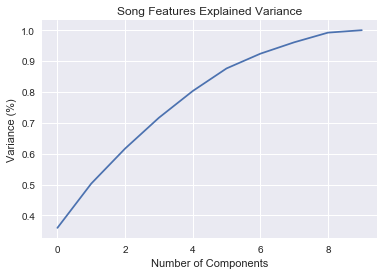

In [13]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Song Features Explained Variance')
plt.show()

In [14]:
data_scaled = pd.DataFrame(Xtr, columns = features)

In [15]:
# transform dataset using n_comps = 3
pca = PCA(n_components=3).fit(Xtr)
x = pca.transform(Xtr)

In [16]:
pca3 = pd.DataFrame(pca.components_, columns=data_scaled.columns, index=['PC-1','PC-2','PC-3']).T
pca3

,PC-1,PC-2,PC-3
danceability,-0.108231,-0.711383,0.008211
energy,-0.489948,0.148483,-0.076649
acousticness,0.409967,-0.154270,0.149899
valence,-0.319986,-0.459160,0.037517
pitch_med,-0.431140,0.090581,0.264523
timbre_med,-0.300816,-0.151425,0.092903
speechiness,-0.143444,-0.026076,0.719775
loudness,-0.401793,0.136771,-0.363908
tempo,-0.135559,0.370780,0.019779
instrumentalness,0.031782,0.221952,0.490592


### Perform clustering on scaled features Xtr

determine the optimum value of K for clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
def test(data, nClusterRange):
    inertias = np.zeros(len(nClusterRange))
    for i in range(len(nClusterRange)):
        model = KMeans(n_clusters=i+1, init='k-means++').fit(data)
        inertias[i] = model.inertia_
    return inertias

In [19]:
import numpy as np
kRange = range(1,12)
KmeanTopics = test(Xtr, kRange)

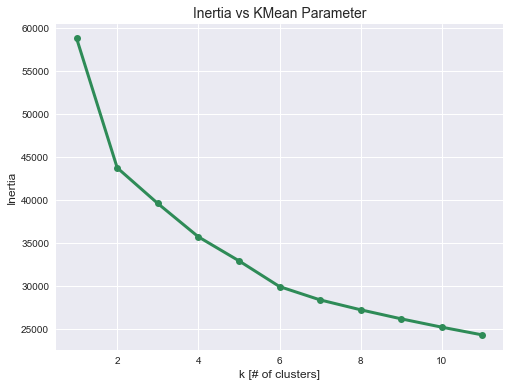

In [20]:
figInertiaWithK = plt.figure(figsize=(8,6))

plt.plot(kRange, KmeanTopics, 'o-', color='seagreen', linewidth=3)
plt.xlabel('k [# of clusters]', size=12)
plt.ylabel('Inertia', size=12)
plt.title('Inertia vs KMean Parameter', size=14)



Let us apply KMeans clustering algorithms using the transformed features and see what patterns/clusters this gives us. 

## KMeans clustering (K = 3) using Scaled features Xtr

In [21]:
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(Xtr)
cluster_labels = km.labels_
songsDF['K_cluster_n3'] = cluster_labels

In [22]:
songsDF['pca1'] = x[:,0]
songsDF['pca2'] = x[:,1]
songsDF['pca3'] = x[:,2]


In [23]:
c1 = songsDF[songsDF.K_cluster_n3 == 0]
c2 = songsDF[songsDF.K_cluster_n3 == 1]
c3 = songsDF[songsDF.K_cluster_n3 == 2]


### Plotting first 3 components from transformed dataset to visualize the resulting clusters

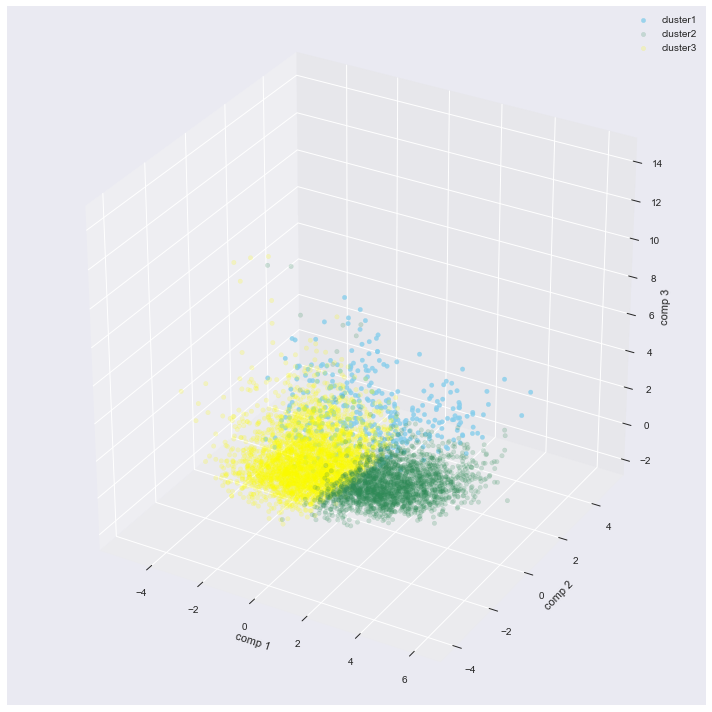

In [24]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure(figsize=(10, 10))
ax = fig3d.add_subplot(111, projection='3d')

p = ax.scatter(c1['pca1'], c1['pca2'], c1['pca3'], color='skyblue', alpha=0.8, label='cluster1')
p = ax.scatter(c2['pca1'], c2['pca2'], c2['pca3'], color='seagreen', alpha=0.2, label='cluster2')
p = ax.scatter(c3['pca1'], c3['pca2'], c3['pca3'], color='yellow', alpha=0.2, label='cluster3')
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')

ax.legend()
fig3d.tight_layout()
plt.savefig('../images/KMeans3D_PCA1_3_N6.png')


In [25]:
country = songsDF[songsDF.genre == 'country']
pop     = songsDF[songsDF.genre == 'pop']

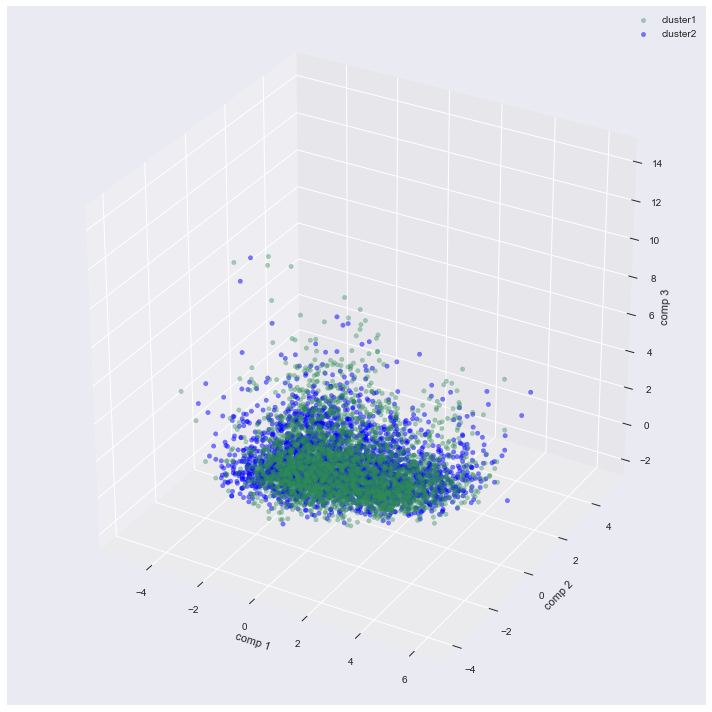

In [26]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure(figsize=(10, 10))
ax = fig3d.add_subplot(111, projection='3d')

p = ax.scatter(country['pca1'], country['pca2'], country['pca3'], color='seagreen', alpha=0.4, label='cluster1')
p = ax.scatter(pop['pca1'], pop['pca2'], pop['pca3'], color='blue', alpha=0.5, label='cluster2')
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')

ax.legend()
fig3d.tight_layout()
plt.savefig('../images/KMeans3D_PCA1_3_CountryPop.png')


## Looking deeper into the resulting cluster features:

Scale the timbre_med column so that it is within 0 to 1 range

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
songsDF['timbre_med_scaled'] = scaler.fit_transform(songsDF[['timbre_med']])

In [28]:
def clustSummary(col, k):
    clust_summ = {'group':[], 'danceability':[], 'energy':[],
                  'acousticness': [], 'valence': [], 'pitch':[], 'timbre':[]}

    for num in range(k):
        clust_summ['group'].append('Cluster{}'.format(num))
        clust_summ['danceability'].append(songsDF[songsDF[col] == num]['danceability'].median())
        clust_summ['energy'].append(songsDF[songsDF[col] == num]['energy'].median())
        clust_summ['acousticness'].append(songsDF[songsDF[col] == num]['acousticness'].median())
        clust_summ['valence'].append(songsDF[songsDF[col] == num]['valence'].median())
        clust_summ['pitch'].append(songsDF[songsDF[col] == num]['pitch_med'].median())
        clust_summ['timbre'].append(songsDF[songsDF[col] == num]['timbre_med_scaled'].median())
        
    return clust_summ;

In [29]:
KM3_clust_df = pd.DataFrame(clustSummary('K_cluster_n3',3))[['group','danceability','energy','acousticness','valence','pitch','timbre']]
KM3_clust_df

,group,danceability,energy,acousticness,valence,pitch,timbre
0,Cluster0,0.495,0.6550,0.103,0.3690,0.217500,0.397058
1,Cluster1,0.519,0.3615,0.642,0.2725,0.134250,0.355049
2,Cluster2,0.561,0.7685,0.055,0.5840,0.237375,0.446026


Create Spider plot to visualize the three clusters identified by K-Means

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [34]:
def getClusterSummResults(clustLabel, k=3):
    ''' returns a dataframe with summarized results for the clustering method'''
    
    clust_summ = {'cluster':[],'mSong_tag':[],'count':[], 'Pct Overall Genre': []}
    
    total_msong_pop = songsDF[(songsDF.genre == 'pop')].song_id.count()
    total_msong_country = songsDF[(songsDF.genre == 'country')].song_id.count()
    
    for num in range(k):
        clust_count_cntry = songsDF[(songsDF[clustLabel] == num) & (songsDF.genre == 'country')].song_id.count()
        clust_count_pop   = songsDF[(songsDF[clustLabel] == num) & (songsDF.genre == 'pop')].song_id.count()
    
    
        clust_summ['cluster'].append(num)
        clust_summ['mSong_tag'].append('country')
        clust_summ['count'].append(clust_count_cntry)
        clust_summ['Pct Overall Genre'].append(clust_count_cntry/total_msong_country*100)
    
        clust_summ['cluster'].append(num)
        clust_summ['mSong_tag'].append('pop')
        clust_summ['count'].append(clust_count_pop)
        clust_summ['Pct Overall Genre'].append(clust_count_pop/total_msong_pop*100)

    
    summDF = pd.DataFrame(clust_summ)
    summDF = summDF[['cluster','mSong_tag','count','Pct Overall Genre']].copy()
    return summDF

In [36]:
def plotClusterSpider(KM_clust_df):
    my_palette = plt.cm.get_cmap("Set2", len(KM_clust_df.index))

    plt.figure(figsize=(20,10))

    for row in range(0, len(KM_clust_df.index)):
    
        categories=list(KM_clust_df)[1:]
        N = len(categories)
        title='group '+KM_clust_df['group'][row]
        color=my_palette(row)
 
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
    

    
        # Initialise the spider plot
        ax = plt.subplot(1,3,row+1, polar=True, )
        #ax = plt.subplot(110+(row+1), polar=True, )
 
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
 
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories, color='grey', size=12)
 
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks(np.linspace(0,1.0,5), [str(x) for x in np.linspace(0,1.0,5)], color="grey", size=10)
        plt.ylim(0,1)
 
        # Ind1
        values=KM_clust_df.loc[row].drop('group').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
        ax.fill(angles, values, color=color, alpha=0.4)
 
        # Add a title
        plt.title(title, size=11, color=color, y=1.1, fontsize=20)

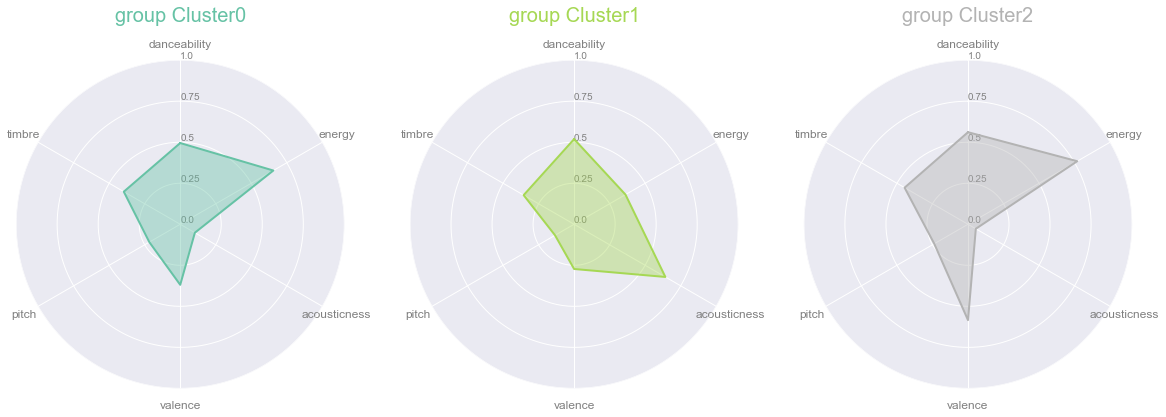

In [37]:
plotClusterSpider(KM3_clust_df)

### Cluster 0 - high energy, low valence, high pitch, low acoustic

In [38]:
songsDF[songsDF.K_cluster_n3 == 0][features ].describe()  

,danceability,energy,acousticness,valence,pitch_med,timbre_med,speechiness,loudness,tempo,instrumentalness
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.483111,0.634128,0.288002,0.407385,0.226869,-0.492157,0.053993,-9.579243,121.447781,0.687381
std,0.169328,0.241873,0.339404,0.244750,0.092067,3.474882,0.044539,3.963132,28.594958,0.165093
min,0.000000,0.000020,0.000002,0.000000,0.038500,-10.720000,0.000000,-34.981000,0.000000,0.309000
25%,0.366000,0.446000,0.002715,0.217000,0.155750,-2.812250,0.031000,-11.667000,102.777500,0.555500
50%,0.495000,0.655000,0.103000,0.369000,0.217500,-0.495000,0.039000,-9.176000,119.948000,0.691000
75%,0.598500,0.847500,0.534500,0.580000,0.287625,1.849250,0.056750,-6.728500,137.820000,0.825500
max,0.905000,0.999000,0.992000,0.982000,0.547000,8.153000,0.343000,-0.311000,233.429000,0.983000


### Cluster 1 -  lower energy, high acoustic, lowest valence, low timbre, low pitch

In [41]:
songsDF[songsDF.K_cluster_n3 == 1][features ].describe() 

,danceability,energy,acousticness,valence,pitch_med,timbre_med,speechiness,loudness,tempo,instrumentalness
count,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000
mean,0.505664,0.354692,0.584988,0.310706,0.138341,-1.845064,0.038263,-10.996181,113.823550,0.023161
std,0.140923,0.142502,0.286616,0.182217,0.042094,3.310189,0.046626,3.522666,29.483244,0.070692
min,0.000000,0.000063,0.000010,0.000000,0.036250,-13.276000,0.000000,-27.809000,0.000000,0.000000
25%,0.412000,0.253250,0.366250,0.175000,0.109000,-4.025125,0.028200,-12.727750,90.821000,0.000001
50%,0.519000,0.361500,0.642000,0.272500,0.134250,-1.847250,0.031600,-10.593500,113.544000,0.000077
75%,0.607000,0.461000,0.832000,0.410000,0.162937,0.218000,0.036700,-8.532250,133.307000,0.005088
max,0.938000,0.789000,0.996000,0.977000,0.376500,13.745000,0.919000,-3.119000,209.088000,0.631000


### Cluster 2 - High energy, high danceability, high valence, high timbre

In [42]:
songsDF[songsDF.K_cluster_n3 == 2][features ].describe()  

,danceability,energy,acousticness,valence,pitch_med,timbre_med,speechiness,loudness,tempo,instrumentalness
count,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000
mean,0.553069,0.756578,0.128833,0.580056,0.245991,1.242407,0.058445,-6.252436,127.072847,0.016232
std,0.142860,0.141700,0.168657,0.214710,0.065266,2.781453,0.059711,2.444940,28.484779,0.055950
min,0.061500,0.173000,0.000002,0.039700,0.076500,-8.076000,0.022300,-22.885000,60.512000,0.000000
25%,0.465000,0.652750,0.006287,0.414000,0.196750,-0.648688,0.031900,-7.561000,105.864250,0.000000
50%,0.561000,0.768500,0.055000,0.584000,0.237375,1.081250,0.040200,-5.854500,124.260000,0.000015
75%,0.648250,0.874000,0.189000,0.752000,0.287625,3.014813,0.059200,-4.555750,144.952500,0.001172
max,0.934000,0.998000,0.946000,0.979000,0.505000,18.913250,0.950000,2.147000,212.913000,0.472000


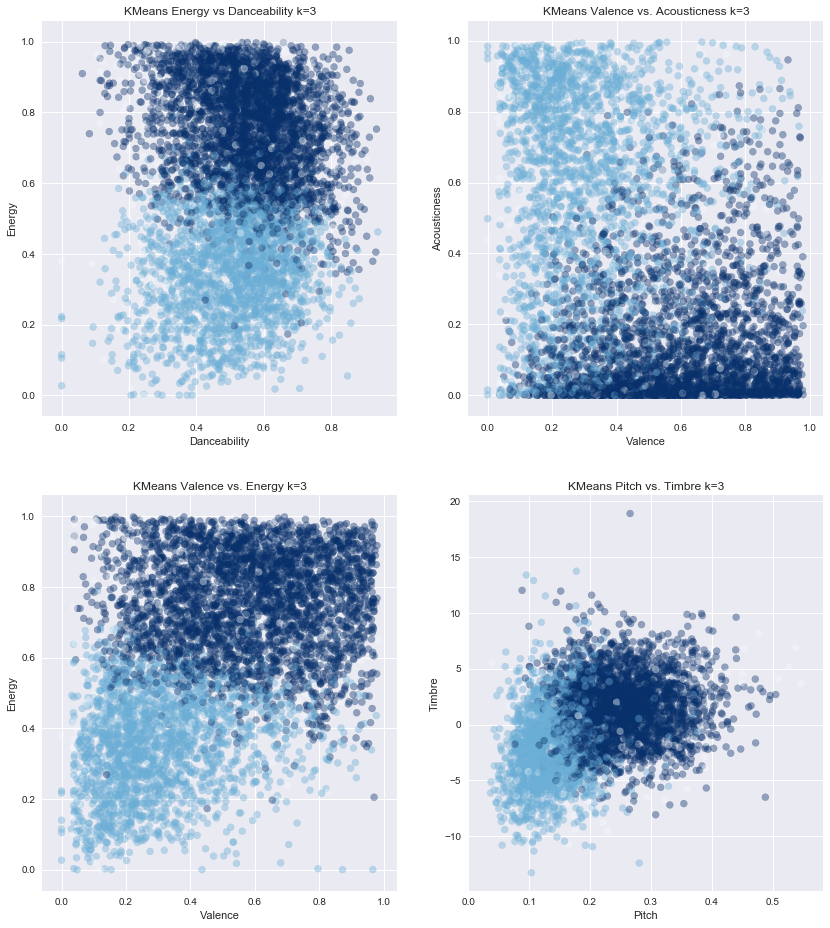

In [43]:
fig = plt.figure(figsize=(14,16))


ax1=plt.subplot(2, 2, 1)
ax1.scatter(songsDF['danceability'],songsDF['energy'],marker='o',c=songsDF['K_cluster_n3'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Danceability')
plt.ylabel('Energy')
ax1.set_title('KMeans Energy vs Danceability k=3')


ax2=plt.subplot(2, 2, 2)
ax2.scatter(songsDF['valence'],songsDF['acousticness'],marker='o',c=songsDF['K_cluster_n3'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Valence')
plt.ylabel('Acousticness')
ax2.set_title('KMeans Valence vs. Acousticness k=3')


ax3=plt.subplot(2, 2, 3)
ax3.scatter(songsDF['valence'],songsDF['energy'],marker='o',c=songsDF['K_cluster_n3'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Valence')
plt.ylabel('Energy')
ax3.set_title('KMeans Valence vs. Energy k=3')

ax4=plt.subplot(2, 2, 4)
ax4.scatter(songsDF['pitch_med'],songsDF['timbre_med'],marker='o',c=songsDF['K_cluster_n3'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3) )
plt.xlabel('Pitch')
plt.ylabel('Timbre')
ax4.set_title('KMeans Pitch vs. Timbre k=3')

plt.savefig('../images/KMeans_FeaturesClusters_K3.png')

## Let us explore how the clusters will be divided if we just create two clusters

In [44]:
km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(Xtr)
cluster_labels = km.labels_
songsDF['K_cluster_n2'] = cluster_labels

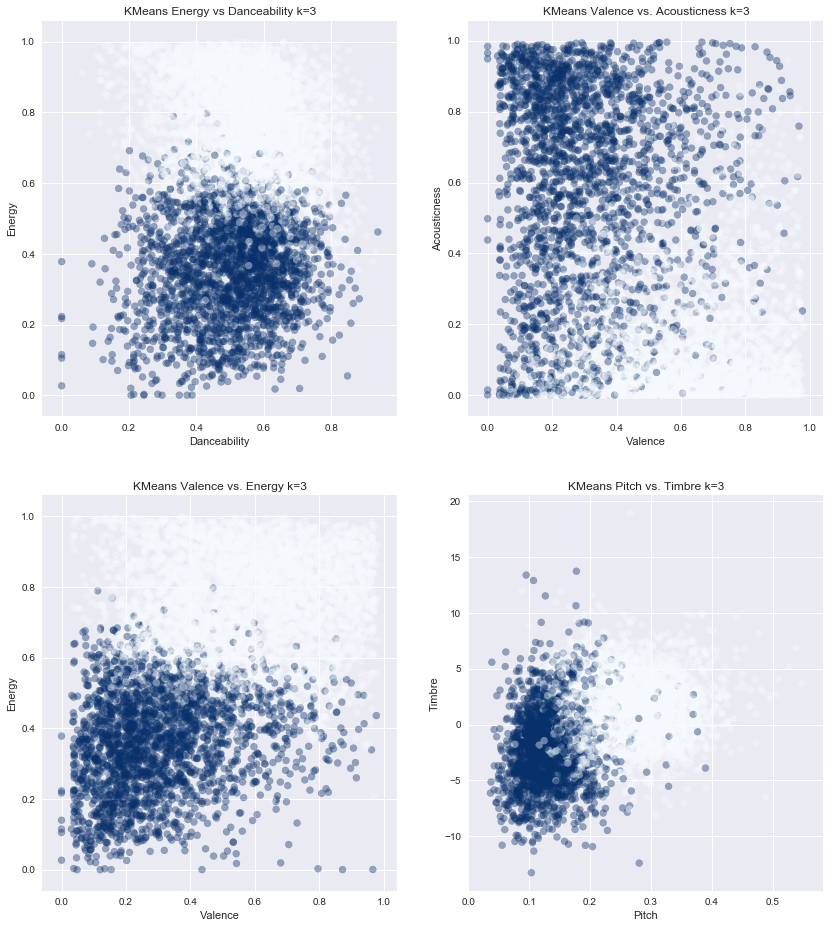

In [45]:
fig = plt.figure(figsize=(14,16))


ax1=plt.subplot(2, 2, 1)
ax1.scatter(songsDF['danceability'],songsDF['energy'],marker='o',c=songsDF['K_cluster_n2'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Danceability')
plt.ylabel('Energy')
ax1.set_title('KMeans Energy vs Danceability k=3')


ax2=plt.subplot(2, 2, 2)
ax2.scatter(songsDF['valence'],songsDF['acousticness'],marker='o',c=songsDF['K_cluster_n2'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Valence')
plt.ylabel('Acousticness')
ax2.set_title('KMeans Valence vs. Acousticness k=3')


ax3=plt.subplot(2, 2, 3)
ax3.scatter(songsDF['valence'],songsDF['energy'],marker='o',c=songsDF['K_cluster_n2'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3), )
plt.xlabel('Valence')
plt.ylabel('Energy')
ax3.set_title('KMeans Valence vs. Energy k=3')

ax4=plt.subplot(2, 2, 4)
ax4.scatter(songsDF['pitch_med'],songsDF['timbre_med'],marker='o',c=songsDF['K_cluster_n2'], alpha=0.4,
           cmap=plt.cm.get_cmap('Blues', 3) )
plt.xlabel('Pitch')
plt.ylabel('Timbre')
ax4.set_title('KMeans Pitch vs. Timbre k=3')

plt.savefig('../images/KMeans_FeaturesClusters_K2.png')

In [46]:
KM2_clust_df = pd.DataFrame(clustSummary('K_cluster_n2',2))[['group','danceability','energy','acousticness','valence','pitch','timbre']]
KM2_clust_df

,group,danceability,energy,acousticness,valence,pitch,timbre
0,Cluster0,0.558,0.771,0.0523,0.577,0.2385,0.445063
1,Cluster1,0.517,0.367,0.6400,0.272,0.1360,0.354633


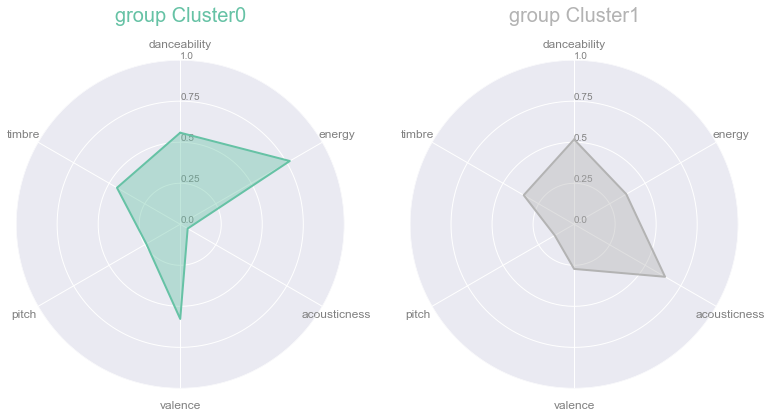

In [47]:
plotClusterSpider(KM2_clust_df)

In [42]:
songsDF[songsDF.K_cluster_n2 == 0][features ].describe()  

,danceability,energy,acousticness,valence,pitch_med,timbre_med
count,3517.000000,3517.000000,3517.000000,3517.000000,3517.000000,3517.000000
mean,0.555537,0.758273,0.126348,0.585836,0.249626,1.232198
std,0.144908,0.146161,0.170523,0.212113,0.066199,2.811339
min,0.061500,0.156000,0.000002,0.032800,0.076500,-8.076000
25%,0.467000,0.658000,0.005260,0.424000,0.200000,-0.663500
50%,0.566000,0.775000,0.051600,0.590000,0.240500,1.090000
75%,0.652000,0.878000,0.184000,0.753000,0.291500,3.043000
max,0.938000,0.999000,0.992000,0.982000,0.547000,18.913250


In [43]:
songsDF[songsDF.K_cluster_n2 == 1][features ].describe() 

,danceability,energy,acousticness,valence,pitch_med,timbre_med
count,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000
mean,0.495106,0.368446,0.573412,0.298643,0.139463,-1.830760
std,0.140662,0.152779,0.293434,0.172486,0.041532,3.290001
min,0.000000,0.000020,0.000002,0.000000,0.036250,-13.276000
25%,0.400000,0.260000,0.340750,0.172000,0.110500,-3.955938
50%,0.508000,0.371000,0.631000,0.266000,0.137000,-1.791125
75%,0.596000,0.478000,0.830000,0.393250,0.165000,0.224688
max,0.883000,0.959000,0.996000,0.966000,0.389500,13.745000
